In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%matplotlib widget

In [3]:

# Constants
n = 1800

# Define the AICc function
def AICc(k, delta_chi2):
    return 2*k + (2*k)*(k + 1)/(n - k - 1) + delta_chi2


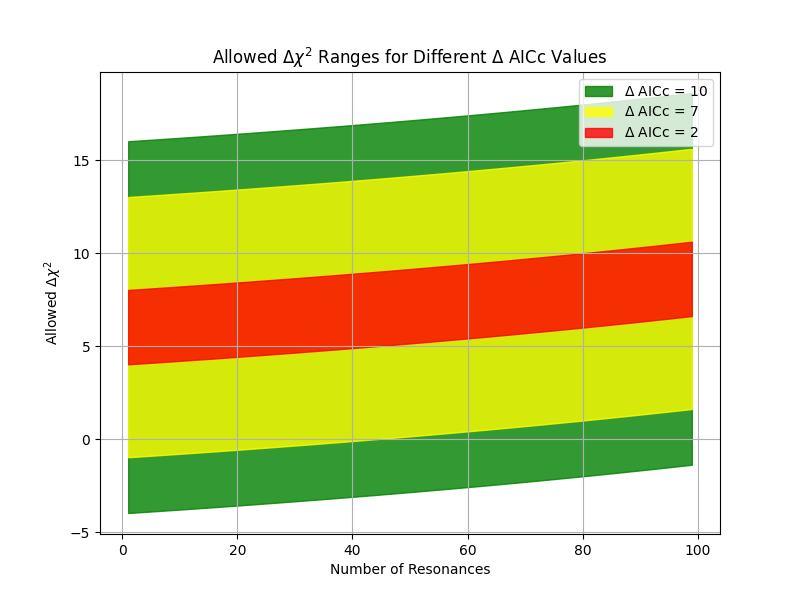

In [4]:

# Define the range of parameters (k values)
k_values = np.arange(3, 303, 3)  # k values for 1 to 100 resonances (k = 3 * number of resonances)

# Different delta_AIC values
delta_AIC_values = [2, 7, 10]

delta_chi2_bounds = {delta_AIC: {'lower': [], 'upper': []} for delta_AIC in delta_AIC_values}

for delta_AIC in delta_AIC_values:
    for i in range(len(k_values) - 1):
        k1 = k_values[i]
        k2 = k_values[i + 1]
        delta_chi2_lower = AICc(k2, 0) - AICc(k1, 0) - delta_AIC
        delta_chi2_upper = AICc(k2, 0) - AICc(k1, 0) + delta_AIC
        delta_chi2_bounds[delta_AIC]['lower'].append(delta_chi2_lower)
        delta_chi2_bounds[delta_AIC]['upper'].append(delta_chi2_upper)


plt.figure(figsize=(8, 6))
colors = ['red', 'yellow', 'green']  # Colors for the filled areas
alpha_value = 0.8  # Transparency for the filled areas

# Plotting in reverse order so that smaller Delta AICc (more restrictive) is on top
for i, delta_AIC in reversed(list(enumerate(delta_AIC_values))):
    plt.fill_between(range(1, 100), delta_chi2_bounds[delta_AIC]['lower'], 
                     delta_chi2_bounds[delta_AIC]['upper'], color=colors[i], 
                     alpha=alpha_value, 
                     label=f'$\Delta$ AICc = {delta_AIC}')

plt.xlabel('Number of Resonances')
plt.ylabel('Allowed $\Delta \chi^2$')
plt.title('Allowed $\Delta \chi^2$ Ranges for Different $\Delta$ AICc Values')
plt.legend()
plt.grid(True)
plt.show()

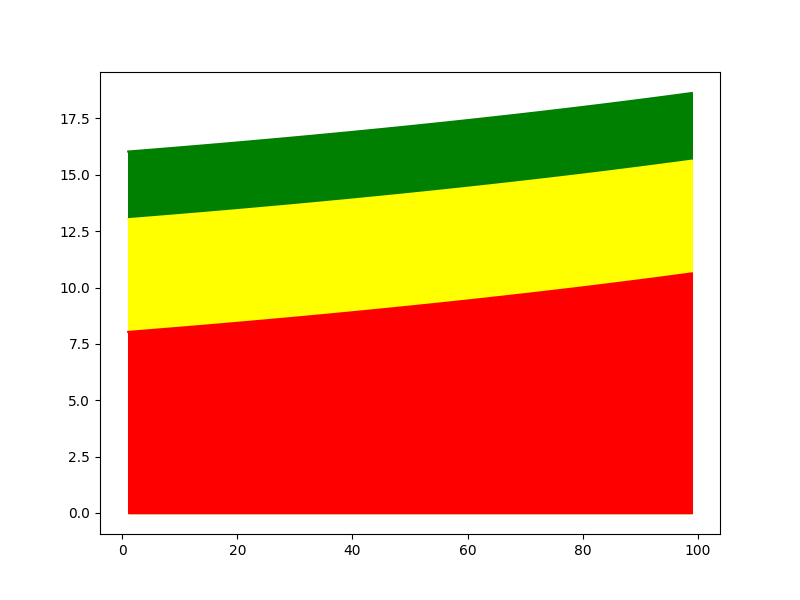

In [11]:
# we need only upper limit?
# Plotting the results with filled areas for the upper limits only
plt.figure(figsize=(8, 6))

colors = colors[::-1] #['red', 'yellow', 'green'].reverse

areas=[]

# Plotting only the upper limits
for i, delta_AIC in reversed(list(enumerate(delta_AIC_values))):
    plt.plot(range(1, 100), delta_chi2_bounds[delta_AIC]['upper'], color=colors[i], 
             label=f'$\Delta$ AICc = {delta_AIC}')
    plt.fill_between(range(1, 100), 0, delta_chi2_bounds[delta_AIC]['upper'], 
                     color=colors[i], alpha=1.0, zorder=1)
    

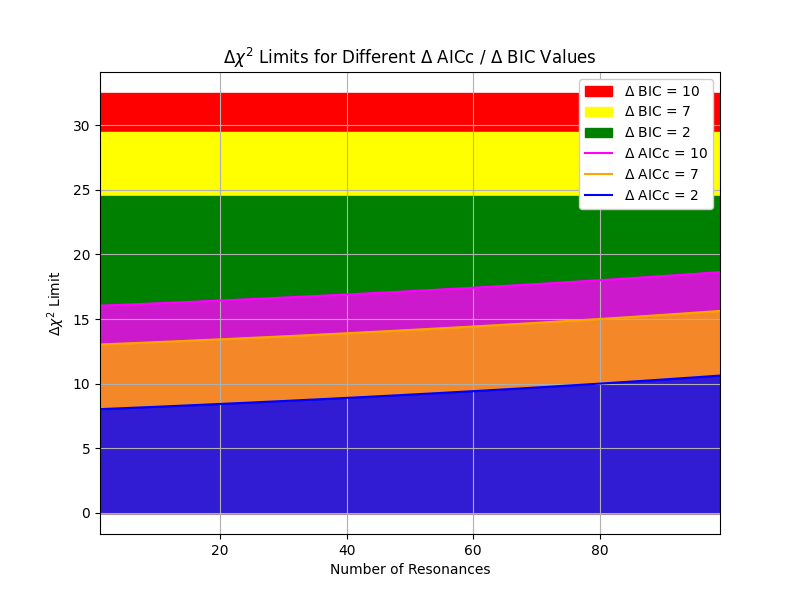

In [27]:

# BIC
    
def BIC(k, delta_chi2):
    return k * np.log(n) + delta_chi2

delta_BIC_values = [2, 7, 10]
delta_BIC_bounds = {delta_BIC: {'lower': [], 'upper': []} for delta_BIC in delta_BIC_values}

for delta_BIC in delta_BIC_values:
    for i in range(len(k_values) - 1):
        k1 = k_values[i]
        k2 = k_values[i + 1]
        delta_chi2_lower = BIC(k2, 0) - BIC(k1, 0) - delta_BIC
        delta_chi2_upper = BIC(k2, 0) - BIC(k1, 0) + delta_BIC
        delta_BIC_bounds[delta_BIC]['lower'].append(delta_chi2_lower)
        delta_BIC_bounds[delta_BIC]['upper'].append(delta_chi2_upper)

# Plotting the results with filled areas for BIC
plt.figure(figsize=(8, 6))
colors = ['red', 'yellow', 'green']  # Colors for the filled areas
colors = colors[::-1]
colors2 = ['blue', 'orange', 'magenta']
alpha_value = 1.0  # Transparency for the filled areas

# Plotting in reverse order so that smaller Delta BIC (more restrictive) is on top
for i, delta_BIC in reversed(list(enumerate(delta_BIC_values))):
    plt.fill_between(range(1, 100), 0,
                     delta_BIC_bounds[delta_BIC]['upper'], color=colors[i], 
                     alpha=alpha_value, zorder=0,
                     label=f'$\Delta$ BIC = {delta_BIC}')
    

# Plotting only the upper limits
for i, delta_AIC in reversed(list(enumerate(delta_AIC_values))):
    plt.plot(range(1, 100), delta_chi2_bounds[delta_AIC]['upper'], color=colors2[i], 
             label=f'$\Delta$ AICc = {delta_AIC}')
    plt.fill_between(range(1, 100), 0, delta_chi2_bounds[delta_AIC]['upper'], 
                     color=colors2[i], alpha=0.8, zorder=1)

plt.xlabel('Number of Resonances')
plt.ylabel('$\Delta \chi^2$ Limit')
plt.title('$\Delta \chi^2$ Limits for Different $\Delta$ AICc / $\Delta$ BIC Values')
plt.legend(framealpha=1.0)
plt.xlim(1,99)
plt.grid(True)
plt.show()

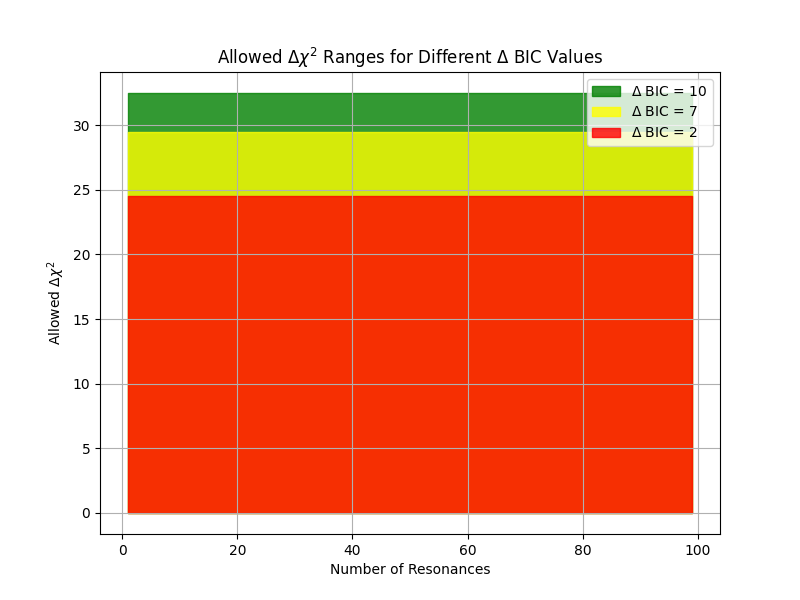

In [7]:
def BIC(k, delta_chi2):
    return k * np.log(n) + delta_chi2

delta_BIC_values = [2, 7, 10]
delta_BIC_bounds = {delta_BIC: {'lower': [], 'upper': []} for delta_BIC in delta_BIC_values}

for delta_BIC in delta_BIC_values:
    for i in range(len(k_values) - 1):
        k1 = k_values[i]
        k2 = k_values[i + 1]
        delta_chi2_lower = BIC(k2, 0) - BIC(k1, 0) - delta_BIC
        delta_chi2_upper = BIC(k2, 0) - BIC(k1, 0) + delta_BIC
        delta_BIC_bounds[delta_BIC]['lower'].append(delta_chi2_lower)
        delta_BIC_bounds[delta_BIC]['upper'].append(delta_chi2_upper)

# Plotting the results with filled areas for BIC
plt.figure(figsize=(8, 6))
colors = ['red', 'yellow', 'green']  # Colors for the filled areas
alpha_value = 0.8  # Transparency for the filled areas

# Plotting in reverse order so that smaller Delta BIC (more restrictive) is on top
for i, delta_BIC in reversed(list(enumerate(delta_BIC_values))):
    plt.fill_between(range(1, 100), 0, 
                     delta_BIC_bounds[delta_BIC]['upper'], color=colors[i], 
                     alpha=alpha_value, 
                     label=f'$\Delta$ BIC = {delta_BIC}')

plt.xlabel('Number of Resonances')
plt.ylabel('Allowed $\Delta \chi^2$')
plt.title('Allowed $\Delta \chi^2$ Ranges for Different $\Delta$ BIC Values')
plt.legend()
plt.grid(True)
plt.show()